<a href="https://colab.research.google.com/github/kausar-vento/PCVK_Genap_2023/blob/main/Minggu%208(UTS)/Week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [3]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Mean

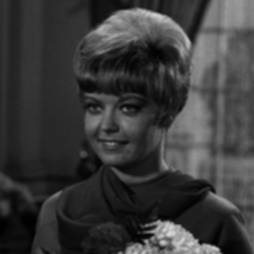

In [9]:
def mean_filter(image, kernel_size):
    height, width = image.shape
    kernel_height, kernel_width = kernel_size, kernel_size
    output_height = height - kernel_height + 1
    output_width = width - kernel_width + 1

    output_image = np.zeros((output_height, output_width), dtype=image.dtype)

    for y in range(output_height):
        for x in range(output_width):
            kernel = image[y:y+kernel_height, x:x+kernel_width].flatten()
            output_image[y, x] = np.sum(kernel) / (kernel_height * kernel_width)

    output_image = output_image.astype(image.dtype)

    return output_image

size = 3
result = mean_filter(img_gray, size)

cv2_imshow(result)


# Modus

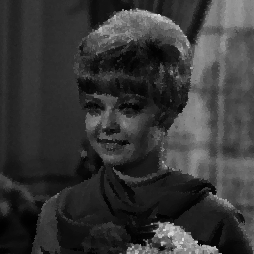

In [5]:
def mode_filter(image, kernel_size):
    height, width = image.shape
    kernel_height, kernel_width = kernel_size, kernel_size
    output_height = height - kernel_height + 1
    output_width = width - kernel_width + 1

    output_image = np.zeros((output_height, output_width), dtype=image.dtype)

    for y in range(output_height):
        for x in range(output_width):
            kernel = image[y:y+kernel_height, x:x+kernel_width].flatten()
            output_image[y, x] = np.bincount(kernel).argmax()

    output_image = output_image.astype(image.dtype)

    return output_image

kernel_modus = 3
result = mode_filter(img_gray, kernel_modus)

cv2_imshow(result)


# Median

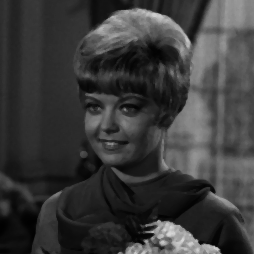

In [6]:
def median_filter(image, kernel_size):
    height, width = image.shape
    kernel_height, kernel_width = kernel_size, kernel_size
    output_height = height - kernel_height + 1
    output_width = width - kernel_width + 1

    output_image = np.zeros((output_height, output_width), dtype=image.dtype)

    for y in range(output_height):
        for x in range(output_width):
            kernel = image[y:y+kernel_height, x:x+kernel_width].flatten()
            output_image[y, x] = np.median(kernel)

    output_image = output_image.astype(image.dtype)

    return output_image

kernel_median = 3
result = median_filter(img_gray, kernel_median)

cv2_imshow(result)


# High Pass

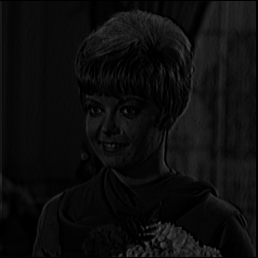

In [7]:
kernel_high_pass = np.array([
    [-1, 0, 1],
    [-1, 0, 3],
    [-1, 0, 1]
])

result_mean = convolution2d(img_gray, kernel_high_pass, 1, 2)
cv2_imshow(result_mean)

# Low Pass

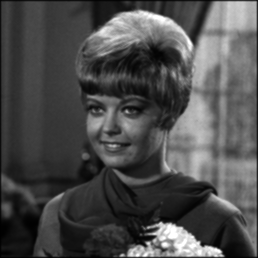

In [8]:
kernel_low_pass = np.array([
    [1, 1, 1],
    [1, 4, 1],
    [1, 1, 1]
])

result_mean = convolution2d(img_gray, kernel_low_pass, 1, 2)
cv2_imshow(result_mean)